Segregate black and white pixels

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_path = 'rose.jpg'
image = Image.open(image_path)

In [3]:
gray_image = image.convert('L')
gray_array = np.array(gray_image)

In [4]:
print(gray_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
white_mask = (gray_array >= 127)
invert_white_mask = (gray_array < 127)

white_image = np.stack([gray_array, gray_array, gray_array], axis=-1)
white_image[white_mask] = [255, 255, 255]
white_image[invert_white_mask] = [0, 0, 0] 

white_image_pil = Image.fromarray(white_image)

In [6]:
black_mask = (gray_array <= 127)
invert_black_mask = (gray_array > 127)

black_image = np.stack([gray_array, gray_array, gray_array], axis=-1)
black_image[black_mask] = [255, 255, 255]
black_image[invert_black_mask] = [0, 0, 0]

black_image_pil = Image.fromarray(black_image)

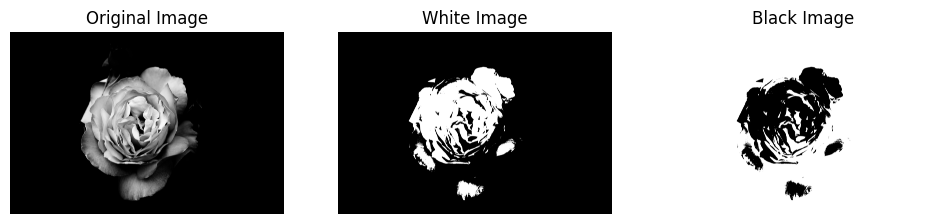

In [7]:
# Display the original and highlighted images
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("White Image")
plt.imshow(white_image_pil)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Black Image")
plt.imshow(black_image_pil)
plt.axis('off')

plt.show()

Separate Red, Green and Blue channels from RGB image

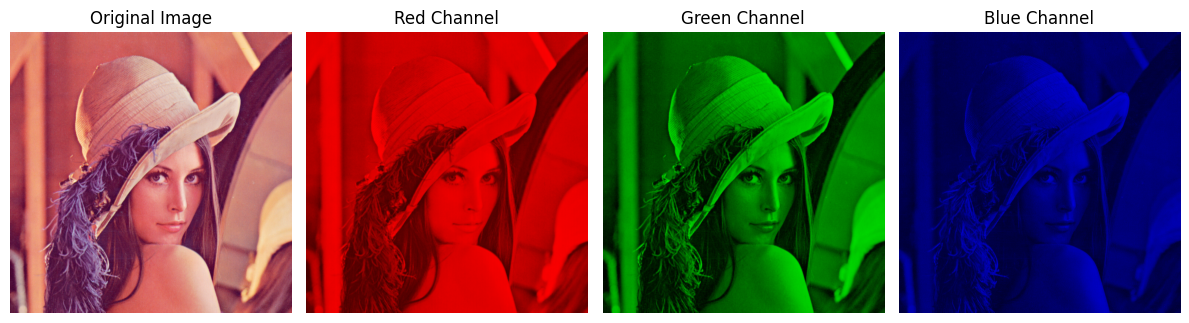

In [8]:
image_path = 'lenna.png' 
image = Image.open(image_path)

image_array = np.array(image)

red_channel = image_array.copy()
red_channel[:, :, 1] = 0
red_channel[:, :, 2] = 0

green_channel = image_array.copy()
green_channel[:, :, 0] = 0
green_channel[:, :, 2] = 0

blue_channel = image_array.copy()
blue_channel[:, :, 0] = 0
blue_channel[:, :, 1] = 0

plt.figure(figsize=(12, 8))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Red Channel")
plt.imshow(red_channel)
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Green Channel")
plt.imshow(green_channel)
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Blue Channel")
plt.imshow(blue_channel)
plt.axis('off')

plt.tight_layout()
plt.show()


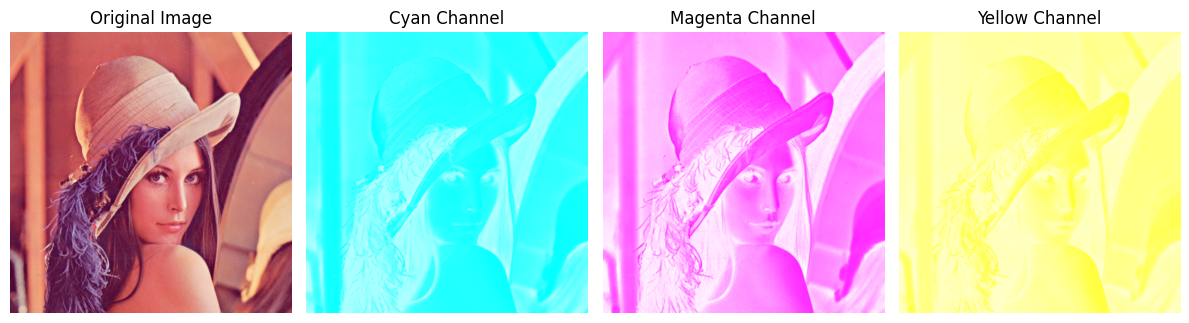

In [9]:
rgb_array = np.array(image) / 255.0
cmy_array = 1 - rgb_array

cmy_array = (cmy_array * 255).astype(np.uint8)

cyan_channel = cmy_array.copy()
cyan_channel[:, :, 1] = 255
cyan_channel[:, :, 2] = 255

magenta_channel = cmy_array.copy()
magenta_channel[:, :, 0] = 255
magenta_channel[:, :, 2] = 255

yellow_channel = cmy_array.copy()
yellow_channel[:, :, 0] = 255
yellow_channel[:, :, 1] = 255

plt.figure(figsize=(12, 8))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Cyan Channel")
plt.imshow(cyan_channel)
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Magenta Channel")
plt.imshow(magenta_channel)
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Yellow Channel")
plt.imshow(yellow_channel)
plt.axis('off')

plt.tight_layout()
plt.show()

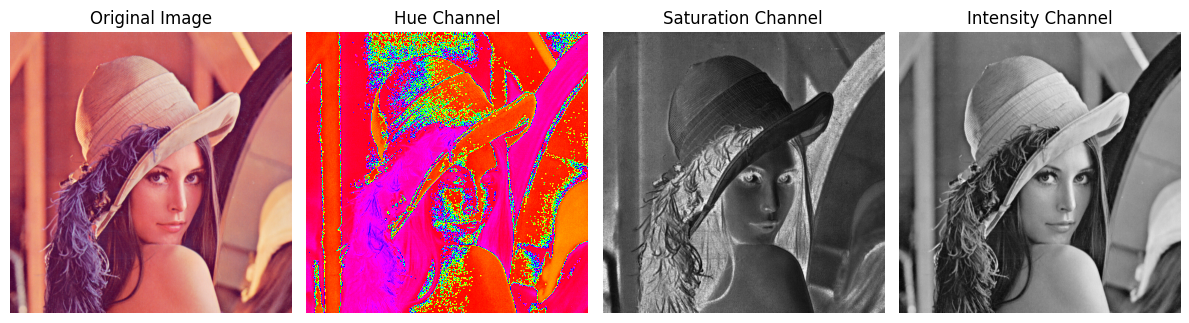

In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def rgb_to_hsi(image):
    rgb = np.array(image, dtype=np.float64) / 255.0
    
    R, G, B = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
    
    I = (R + G + B) / 3.0
    
    min_RGB = np.minimum(np.minimum(R, G), B)
    S = 1 - (3 / (R + G + B + 1e-6)) * min_RGB
    S[R + G + B == 0] = 0
    
    numerator = 0.5 * ((R - G) + (R - B))
    denominator = np.sqrt((R - G)**2 + (R - B) * (G - B))
    theta = np.arccos(numerator / (denominator + 1e-6))
    
    H = np.copy(theta)
    H[B > G] = 2 * np.pi - H[B > G]
    H = H / (2 * np.pi)

    hsi = np.stack((H, S, I), axis=-1)
    
    return hsi

image_path = 'lenna.png'
image = Image.open(image_path)

hsi_image = rgb_to_hsi(image)

H, S, I = hsi_image[:, :, 0], hsi_image[:, :, 1], hsi_image[:, :, 2]

plt.figure(figsize=(12, 8))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Hue Channel")
plt.imshow(H, cmap='hsv')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Saturation Channel")
plt.imshow(S, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Intensity Channel")
plt.imshow(I, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

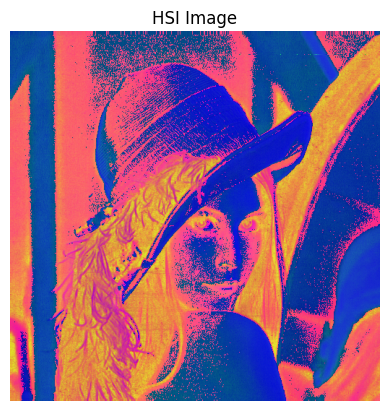

In [11]:
hsi_image = np.stack((H, S, I), axis=-1)
plt.title("HSI Image")
plt.imshow(hsi_image)
plt.axis('off')

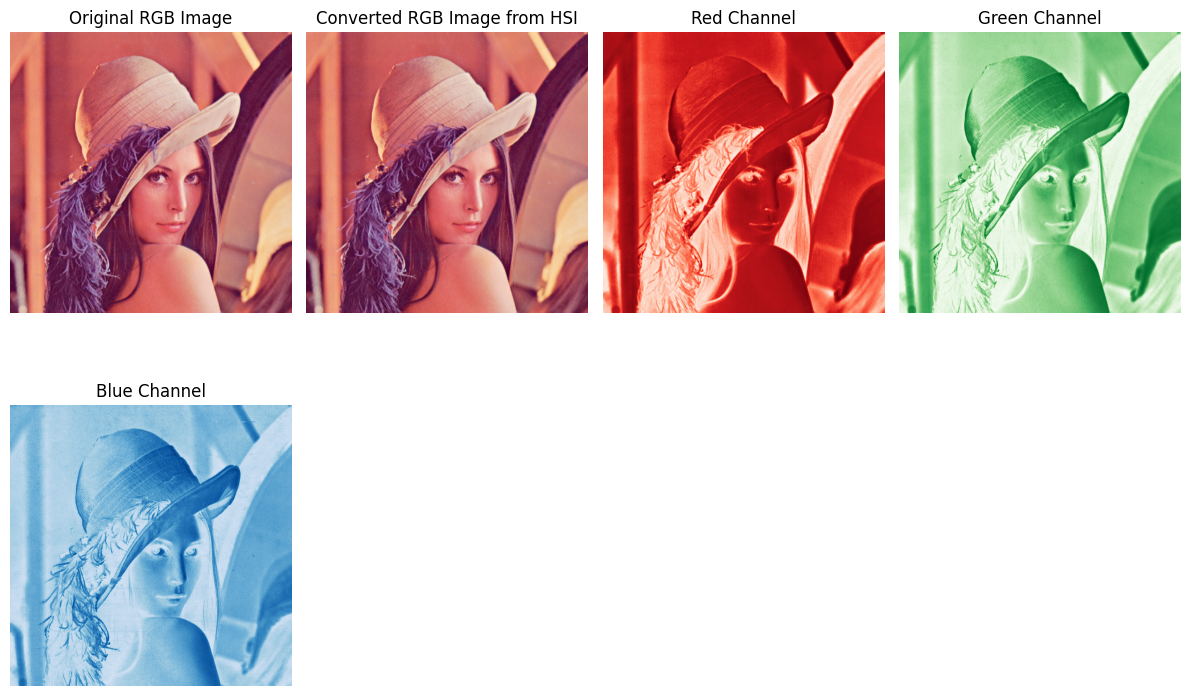

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hsi_to_rgb(H, S, I):
    # Convert H from [0, 1] to [0, 2π]
    H = H * 2 * np.pi

    # Initialize RGB channels
    R = np.zeros_like(H)
    G = np.zeros_like(H)
    B = np.zeros_like(H)

    # Convert HSI to RGB
    for i in range(H.shape[0]):
        for j in range(H.shape[1]):
            if H[i, j] < 2 * np.pi / 3:
                B[i, j] = I[i, j] * (1 - S[i, j])
                R[i, j] = I[i, j] * (1 + S[i, j] * np.cos(H[i, j]) / np.cos(np.pi / 3 - H[i, j]))
                G[i, j] = 3 * I[i, j] - (R[i, j] + B[i, j])
            elif H[i, j] < 4 * np.pi / 3:
                H[i, j] -= 2 * np.pi / 3
                R[i, j] = I[i, j] * (1 - S[i, j])
                G[i, j] = I[i, j] * (1 + S[i, j] * np.cos(H[i, j]) / np.cos(np.pi / 3 - H[i, j]))
                B[i, j] = 3 * I[i, j] - (R[i, j] + G[i, j])
            else:
                H[i, j] -= 4 * np.pi / 3
                G[i, j] = I[i, j] * (1 - S[i, j])
                B[i, j] = I[i, j] * (1 + S[i, j] * np.cos(H[i, j]) / np.cos(np.pi / 3 - H[i, j]))
                R[i, j] = 3 * I[i, j] - (G[i, j] + B[i, j])

    # Clip the RGB values to the range [0, 1]
    R = np.clip(R, 0, 1)
    G = np.clip(G, 0, 1)
    B = np.clip(B, 0, 1)

    # Combine the RGB channels
    rgb_image = cv2.merge([B, G, R])

    return rgb_image

# Load the image in color
image = cv2.imread(image_path)

# Check if the image was loaded
if image is None:
    raise ValueError("Image not found. Please check the file path.")

# Convert RGB to HSI
def rgb_to_hsi(image):
    image = image.astype(np.float32) / 255.0
    B, G, R = cv2.split(image)
    I = (R + G + B) / 3.0
    min_rgb = np.minimum(np.minimum(R, G), B)
    denominator = R + G + B
    denominator[denominator == 0] = 1
    S = 1 - (3 * min_rgb) / denominator
    numerator = 0.5 * ((R - G) + (R - B))
    denominator = np.sqrt((R - G)**2 + (R - B) * (G - B))
    denominator[denominator == 0] = 1
    theta = np.arccos(numerator / denominator)
    H = np.where(B > G, 2 * np.pi - theta, theta)
    H = H / (2 * np.pi)
    return H, S, I

H, S, I = rgb_to_hsi(image)

# Convert HSI back to RGB
rgb_image = hsi_to_rgb(H, S, I)

B, G, R = cv2.split(image)

# Display the original image and the converted RGB image
plt.figure(figsize=(12, 8))
plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
plt.title('Converted RGB Image from HSI')
plt.axis('off')
# Display the H channel
plt.subplot(2, 4, 3)
plt.imshow(R, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

# Display the S channel
plt.subplot(2, 4, 4)
plt.imshow(S, cmap='Greens')
plt.imshow(G, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

# Display the I channel
plt.subplot(2, 4, 5)
plt.imshow(B, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')


plt.tight_layout()
plt.show()